# Smartbuildings: Voorspellen van de bezettingsgraad op verschillende campuslocaties met behulp van tellingen van WiFi-verbindingen

## "Een casestudy voor voorspellingsmodellen van tijdseries"

door de Hogeschool van Amsterdam (HvA), Lectoraat Urban Analytics (Adil Ayi en Pieter Bons)

In deze demo presenteren wij de resultaten uit het Paper: “Time-Series Forecasting Models for Campus Building Occupancy using Wi-Fi Data”. In dit onderzoek gebruiken we geaggregeerde tellingen van het aantal WiFi-verbindingen als proxy voor de bezetting van de gebouwen in de gezamenlijke campus van de Hogeschool van Amsterdam en de Universiteit van Amsterdam. Omdat deze gegevens niet openbaar gemaakt mogen worden demonstreren we de gebruikte technieken door middel van een openbaar beschikbare dataset. Deze dataset is afkomstig van the University of Utah waar metingen zijn uitgevoerd voor de bezettingsgraad van 4 locaties op Campus, namelijk:  Auditorium, Dancehall, Labs en Housing. De data is verzameld in de periode van 2018-01-01 t/m 31-12-2018.

Bronvermelding Data: Legorburu, Gabriel; Smith, Amanda (2020), “Data for: Incorporating Observed Data into Early Design Energy Models for Life Cycle Cost and Emissions Analysis of Campus Buildings”, Mendeley Data, V1, doi: 10.17632/k5ct82yvsv.1

Bezettingsmodellering van gebouwen wordt gebruikt in besluitvormingen door het serviceteam en speelt daarom een sleutelrol in de context van “Smart Buildings” en serviceoptimalisatie. In deze case study voorspellen we de bezettingsgraad voor een grote universiteitscampus. De data die gebruikt wordt komt van de Universiteit van Utah in Amerika waar het aantal actieve Wi-Fi-verbindingen op vaste tijdsintervallen op verschillende locaties op campus zijn bepaald. Wij voeren een modelvergelijking uit voor tijdreeksmodellen: dynamische regressie met seizoensgebonden autoregressieve geïntegreerde voortschrijdend gemiddelde (R-SARIMA) en toestandsruimte Goniometrische Box-Cox getransformeerd met ARIMA-fouten, Trend Seizoenscomponentenmodel (TBATS). 
Deze econometrische modellen worden vergeleken met benchmarks bestaande uit een Judgemental Forecasting-methode (niet-lineair) en een Lineair Model (additief). Onze empirische studie bestaat uit een rollende vensteropstelling (rolling window) met 4 weken aan schattingsgegevens (train) en een voorspellingshorizon tot 7 dagen (test), gegeven een dagelijkse frequentie van 24 metingen. Dit resulteert in een grote out-of-sample voorspelling van 168 meetpunten vooruit. Het onderzoek biedt inzichten voor seriveteams die over vergelijkbare data beschikken en ook de bezettingsgraad willen voorspellen. Op basis van onze modelvergelijking weet men welk model het beste toegepast kan worden afhankelijke van het type gebouw.

We laten zien dat alle modellen de snel veranderende meervoudige seizoensinvloeden in onze bezettingsperiode correct kunnen vastleggen. De verschillen in de prestatie zijn gerelateerd aan de tijdreeks kenmerken en de opzet van de methoden en prognoses waar deze Demo meerendeels om gaat. We concluderen dat de geavanceerde tijdreeksmodellen (TBATS en
R-SARIMA) goed presteren voor voorspellingen op korte termijn, waarbij Judgemental Forecast en Linear Model kunnen worden aangepast om goed te presteren op een lange termijn voorspelling. Van de twee econometrische modellen lijkt TBATS het veel beter te doen, in 3 van de 4 scenario's blijkt TBATS het optimale model te zijn.

## Inhoudsopgave
1. Data
    1. Auditorium
    2. Dancing Hall
    3. Labs
    4. Student Housing
    5. Kenmerken
2. Modellen
    1. SARIMA
    2. TBATS
    3. Linear Regression Model 
    4. Judgmental Forecasting
3. Resultaten
4. Conclusie

### 1. Data

In deze case study worden vier datasets gebruikt: 'classroom_auditorium', 'classroom_dance', 'classroom_labs', 'data_housing'. Deze data beschrijft de "occupancy" (bezettingsgraad) van de locatie doormiddel van een genormaliseerde waarde tussen [0,1]. Hierdoor is er geen sprake van een trackrecord en wordt de privacy van de studenten en werknemers van de universiteit van Utah gewaarborgd. Om de spreiding van de data vervolgens te verbeteren en uitschieters te dempen is de data getranformeerd (comform de paper) met de volgende variantie-stabiliserende transformatie: 

> $ n_{log} = \log(n + 1),\;  n = normalized\:occupancy$ 

De vier datasets beschrijven karaketeristieke locaties op een college campus die alleen gebruikt wordt voor de voorspellingen en dus niet met elkaar vergeleken moet worden. In dit hoofdstuk wordt de data ingeladen en verkend. We zullen zien hoe de 4 locaties elk ander gedrag blijken te vertonen. Het is interessant om na te gaan welke karakteristieken het meest overeenkomen met uw eigen locatie. 

In [1]:
# naamgeving van data
names = ['classroom_auditorium', 'classroom_dance', 'classroom_labs', 'data_housing']
names2 = ['nlog_audit', 'nlog_dance', 'nlog_lab', 'nlog_house']

In [2]:
#importeer packages voor deze Demo en zet default instellingen
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)                                       
                                                               
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters() #panda ignore
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
plt.style.use('seaborn') 
%matplotlib inline  

In [3]:
#make a dataframe with all the locations
for n in range(len(names)):
    DATAFILE = 'cleandata_' + names[n] + '.csv' # kies welke dataset, github
    df = pd.read_csv(DATAFILE, index_col=0, parse_dates=True)
    
    if n == 0:
        head_df= df
    else:
        iter_df = df
        head_df = pd.concat([head_df[['nlog']], iter_df[['nlog']]], axis=1)
        
head_df.columns = names2
print('Sample of the data:')
display(head_df.head(10))
print('Summary of the data:')
display(head_df.describe())

Sample of the data:


nlog_audit  nlog_dance  nlog_lab  nlog_house
2018-01-01 00:00:00    0.182322    0.200671  0.182322    0.182322
2018-01-01 01:00:00    0.182322    0.200671  0.182322    0.182322
2018-01-01 02:00:00    0.182322    0.200671  0.182322    0.182322
2018-01-01 03:00:00    0.182322    0.200671  0.182322    0.182322
2018-01-01 04:00:00    0.182322    0.200671  0.182322    0.182322
2018-01-01 05:00:00    0.548753    0.200671  0.182322    0.182322
2018-01-01 06:00:00    0.551177    0.200671  0.182322    0.182322
2018-01-01 07:00:00    0.556008    0.200671  0.182322    0.182322
2018-01-01 08:00:00    0.548753    0.191538  0.182322    0.182322
2018-01-01 09:00:00    0.546323    0.200671  0.182322    0.182322

Summary of the data:


nlog_audit   nlog_dance     nlog_lab   nlog_house
count  8760.000000  8760.000000  8760.000000  8760.000000
mean      0.499888     0.336166     0.455186     0.526014
std       0.192233     0.204135     0.185351     0.200765
min       0.182322     0.182322     0.182322     0.182322
25%       0.182322     0.182322     0.182322     0.512218
50%       0.565600     0.200671     0.489548     0.609614
75%       0.600774     0.336472     0.521297     0.693147
max       0.693147     0.693147     0.693147     0.693147

Te zien is hoe elke dataset dezelfde hoeveelheid data punten heeft (count). Uit de gemiddeldes is te zien hoe in de locatie *housing* gemiddeld het meeste mensen zijn over de dag, wat logisch is omdat dit het verblijf is van de studenten (iedereen begint zijn dag in bed). Het laagste gemiddelde is te vinden in de *dancehall*, wat ook logisch is gezien het feit dat de dancehall gebruikt wordt voor feesten en gelegenheden (incidenteel).

Hieronder volgt een simple plot van de tijdreeksen. Zo krijgen we een algemene indruk van hoe ze er uitzien door het jaar heen. Het volgende is te zien:

1. De locaties hebben een harde grens voor de minimum en maximum bezettingsgraad. Dit is te zien over het gehele jaar waarbij het maximum nooit overschreden wordt en regelmatig bereikt wordt. Dit is echter logisch omdat een classroom een maximum hoeveelheid zitplaatsen heeft.
2. Het lijkt alsof Dancehall veel meer metingen heeft maar dit is niet het geval. Door opeenvolgende maxima ziet de plot er zo uit. De dancehall heeft ook een maximum capaciteit en bereikt die regelmatig. 
3. Het Laboratorium is het meest consistent over het jaar heen. Er is wel duidelijk een periodiek patroon te zien.
4. Housing fluctueert veel over het jaar heen. Leuk is te zien hoe in de zomermaanden de housing op campus een sterke afname ondergaat. Dit is natuurlijk normaal omdat men dan terug naar huis gaat of op vakantie gaat.

In [4]:
head_df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

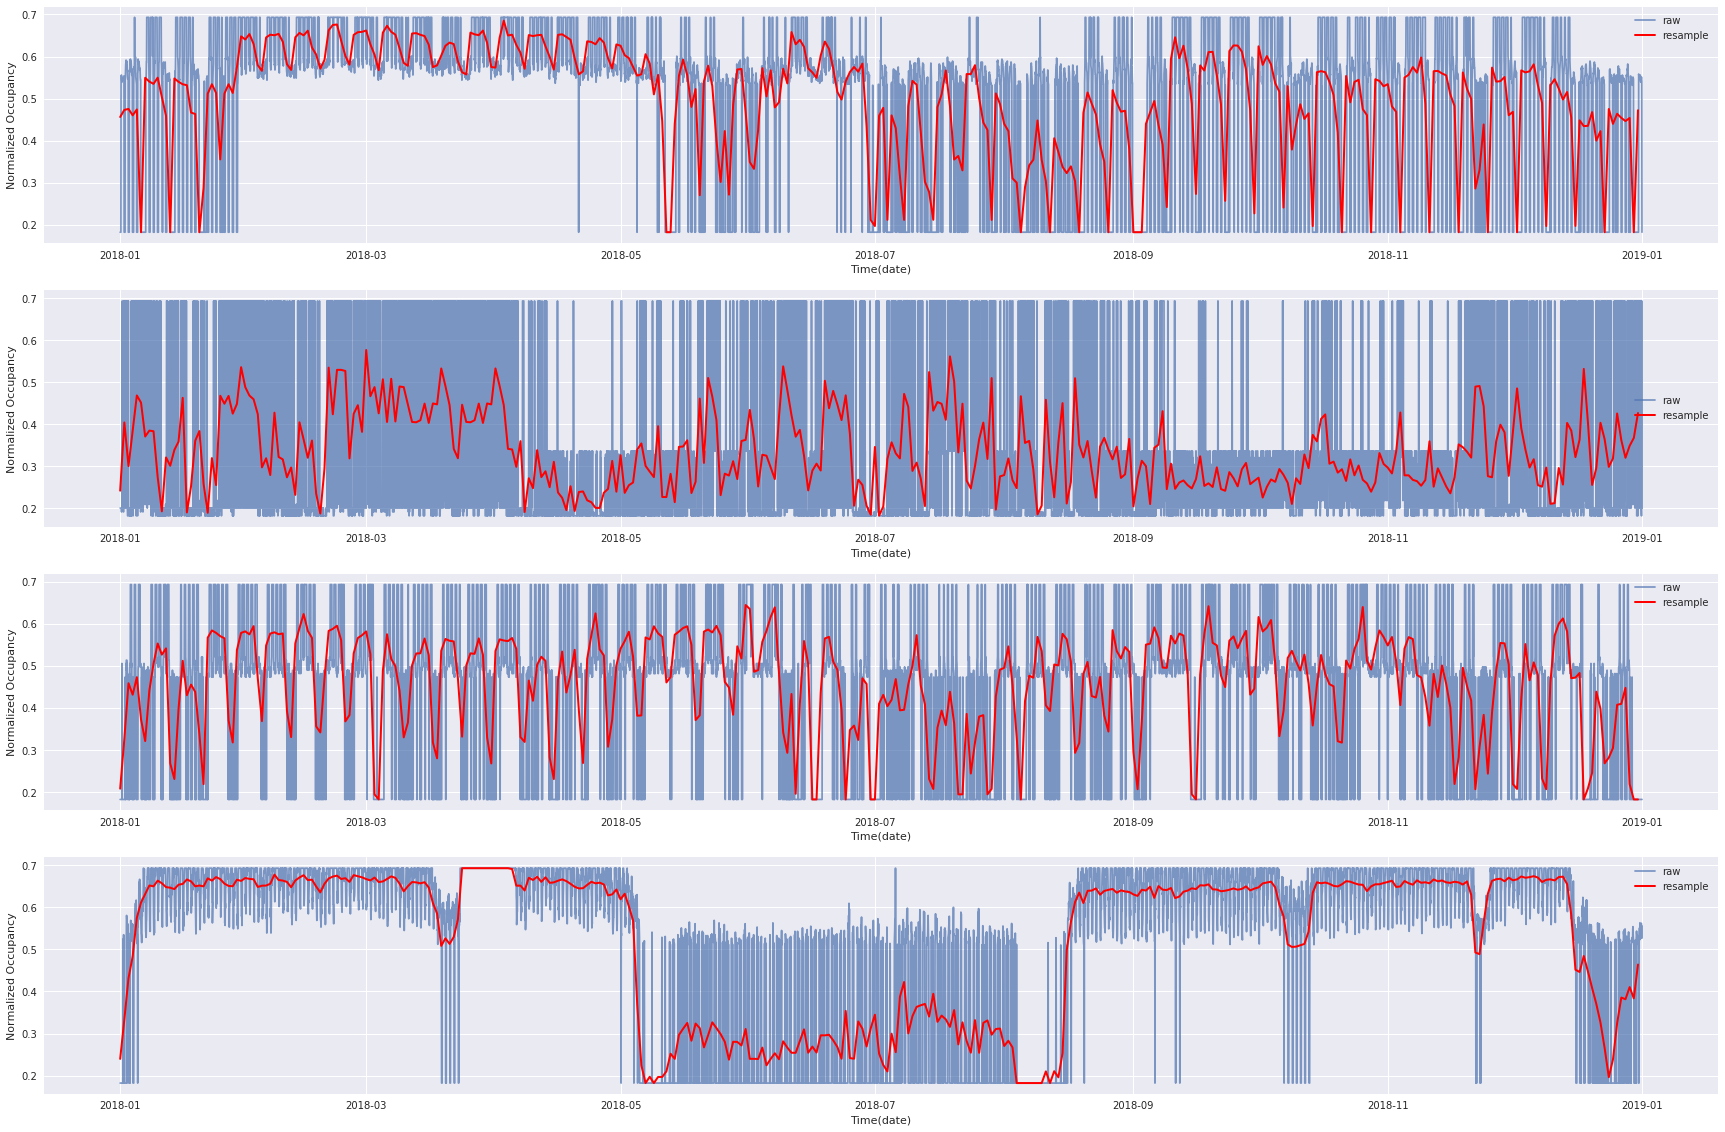

In [5]:
plt.figure(figsize=(30, 20))
for i in range(1, len(head_df.columns)+1):
    plt.subplot(4, 1, i)
#    plt.title(names[i-1])
    plt.xlabel('Time(date)')
    plt.ylabel('Normalized Occupancy')

    plt.plot(head_df.index, head_df.iloc[:,i-1], alpha=0.7, label='raw')
    plt.plot(head_df.resample("D").mean().index, head_df.resample('D').mean().iloc[:,i-1], color='r', lw=2, label='resample')
    plt.legend()

>Weekpatroon

Hierboven is de ontwikkeling van de bezetting te zien over het hele jaar. Om meer inzicht te krijgen over het weekelijks patroon is voor elke locatie het weekpatroon bepaald. Hieronder is een interactieve plot geproduceerd waar doormiddel van een schuifregelaar de weeknummer gekozen kan worden die geplot zal worden (probeer het uit!).

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

color = ['b', 'r', 'g', 'black']
def plotinter(n):
    plt.figure( figsize=(19, 6))
    plt.suptitle(f'week {n}', size=30)
    for i in range(1, len(head_df.columns)+1):
        plt.subplot(4, 1, i)
        if i == 4:
            plt.xlabel('Time(date)')
        
        plt.plot(head_df.iloc[:,i-1][head_df.iloc[:,i-1].index.week == n].index[0:168], head_df.iloc[:,i-1][head_df.iloc[:,i-1].index.week == n][0:168], color=color[i-1], label = names2[i-1])
        
        plt.legend(bbox_to_anchor=(1.0, 0.5), loc='upper left')

interact(plotinter, n=widgets.IntSlider(min=1, max=52, step=1))
plt.show()

interactive(children=(IntSlider(value=1, description='n', max=52, min=1), Output()), _dom_classes=('widget-int…

Om deze 54 plots samen te vatten is ook de gemiddelde weekpatroon bepaald. Hieronder is een functie bepaald die dit voor ons doet. Vervolgens plotten wij deze patronen in één figuur.

In [7]:
# definitie om gemiddelde week te bepalen.
def avgweek(data):
    iso = data
    iso['hour'] = iso.index.hour.values
    iso['weekday'] = iso.index.weekday.values
    iso['week'] = iso.index.week.values

    newiso = iso.pivot_table(index = ['weekday', 'hour'], columns = 'week', margins=False)
    weekgem = newiso.mean(axis=1).values
    return weekgem

In [8]:
import plotly.graph_objects as go

# Add data
hours = head_df[head_df.index.week == 2].index
audit = avgweek(head_df[[head_df.columns[0]]])
dance = avgweek(head_df[[head_df.columns[1]]])
lab = avgweek(head_df[[head_df.columns[2]]])
house = avgweek(head_df[[head_df.columns[3]]]).tolist()

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=hours, y=audit, name='Auditorium',
                         line=dict(color='royalblue', width=2)))
fig.add_trace(go.Scatter(x=hours, y=dance, name = 'Dancehall',
                         line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=hours, y=lab, name='Laboratorium',
                         line=dict(color='green', width=2)
))
fig.add_trace(go.Scatter(x=hours, y=house, name='Housing',
                         line = dict(color='firebrick', width=2)))


# Edit the layout
fig.update_layout(title='Gemiddelde Weekpatroon',
                   xaxis_title='Time(hours)',
                   yaxis_title='Normalized Occupancy',
                 xaxis_tickformat = '%a')


fig.show()

Het volgende is op te merken aan de plot:

1. De dancehall heeft een laagste gemiddelde en vertoont geen periodiek patroon.
2. Housing heeft een constant dagpatroon over de hele week. Dit is volgens verwachting omdat men altijd naar huis zal gaan aan het einde van de dag, ook in het weekend.
3. Het auditorium en laboratorium laten allebei een afname in bezetting zien in het weekend en hebben verder een vergelijkbaar patroon. Dit is logisch aangezien colleges en practica gegeven worden op schooldagen en niet of nauwelijks tijdens het weekend. Auditoria worden echter wel vaker op een zaterdag gebruikt dan de labs.

>#### 1.A Auditorium

Hier volgt een diepere onderzoek naar de auditorium data. Eerst wordt een decompositie uitgevoerd. In de volgende figuur zien we in de eerste plot de ruwe data. De tweede plot geeft de trend weer van de tijdserie over het gehele jaar (period=365). Hier is goed te zien hoe er in februari een forse incidentele verhoging is. Deze toename houdt aan tot mei 2018. De derde plot geeft de periodieke seizoenscomponent (dag + week patroon) aan. Als laatste zien we de errors die overblijven als we het verschil nemen tussen de ruwe data en de twee gvonden componenten. Het is te zien dat de huidige decompositie op geen variatie binnen een dag meeneemt en dat daarom de error afwisselend positief (overdag is waarde hoger) en negatief ('s nachts is de waarde lager) wordt. 

Text(0.5,1,'Decomposition Freq = 365')

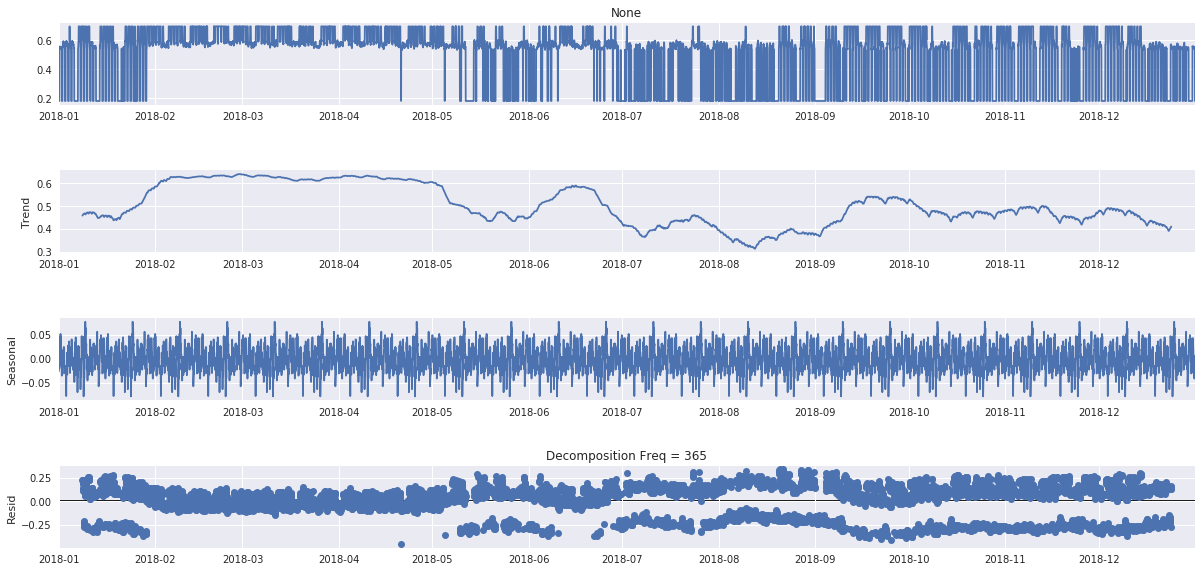

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
auditorium = head_df[['nlog_audit']]
decomposition = seasonal_decompose(auditorium, model = 'additive',period=(365))
  
fig = decomposition.plot()
fig.set_figwidth(19)
fig.set_figheight(9)

plt.title('Decomposition Freq = 365')

Naast de decompositie van de tijdreeks is ook een autocorrelation plot gemaakt om de correlaties tussen waarnemingen zelf en waarnemingen een x-aantal tijdstappen in het verleden (lags). Dit geeft inzicht in welke patronen die er in de tijdreeks bestaan, zowel op korte termijn als op de termijn van het seizoenspatroon. 

We zien dat een waarneming het meest lijkt op de waarneming van een uur daarvoor (hoogste autocorrelatie). Ook Te zien is hoe er een dagelijks patroon is waarbij er om de 24 uur een piek te zien is in de autocorrelatie. Deze dagelijkse autocorrelatie is het hoogst na 168 uur, dit is de zelfde weekdag maar een week ervoor.

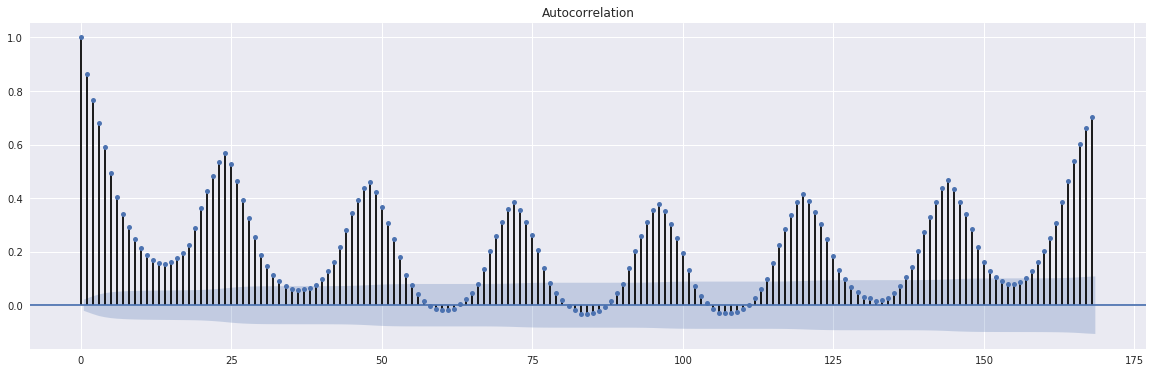

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(auditorium,lags=168)
fig.set_figwidth(20)
fig.set_figheight(6)

>#### 1.B Dancehall

Hier volgt een dieper onderzoek naar de *Dancehall* data volgens dezelfde procedure als eerder werd gebruikt voor het *Auditorium*. Zoals eerder geconstateerd, is de *Dancehall* data het meest onvoorspelbaar. Dit is ook in de decompositie af te lezen waarbij de trend niet makkelijk te interpreteren is. Naast een afname in april zijn er geen opmerkelijke patronen te zien.

Ook hier is de autocorrelatie geplot. Zeer opmerkelijk in de autocorrelatieplot(ACF) is dat er geen pieken af te lezen zijn behalve bij lag 1 (waarneming van het voorafgaande uur). De correlatie is overal bijna 0 dus er is geen sprake van periodieke seizoenspatronen. De *Dancehall* is dus de meest patroonloze tijdserie tot nu en dat zal het maken van voorspellingen moeilijker maken.

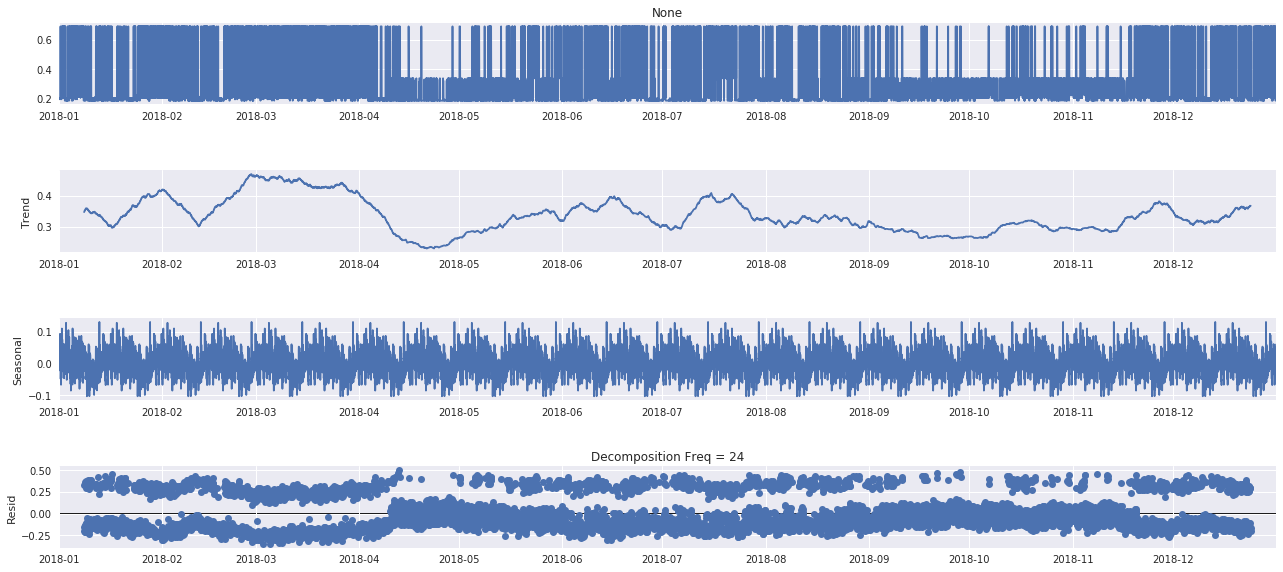

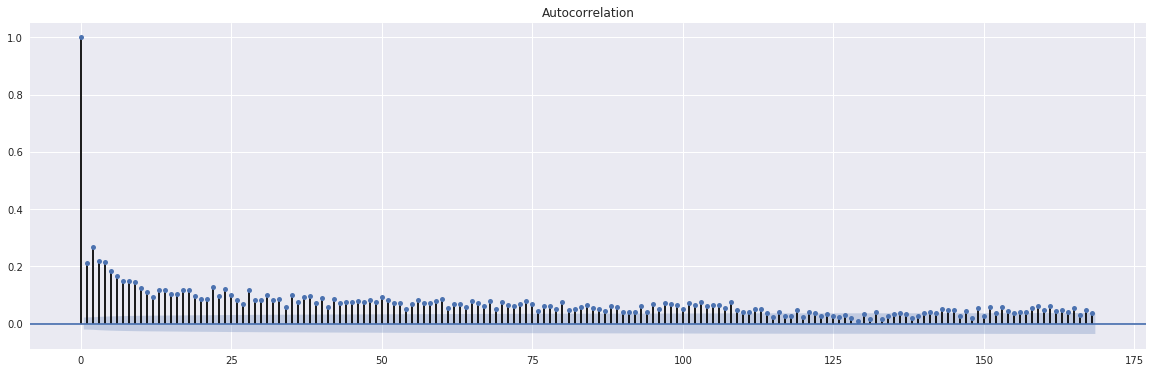

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
dance = head_df[['nlog_dance']]
decomposition = seasonal_decompose(dance, model = 'additive',period=(365))
  
fig = decomposition.plot()
fig.set_figwidth(20)
fig.set_figheight(9)

plt.title('Decomposition Freq = 24')

fig = plot_acf(dance,lags=168)

fig.set_figwidth(20)
fig.set_figheight(6)

>#### 1.C Labs

Hier volgt een dieper onderzoek naar de *Labs* data. het Laboratorium heeft in vergelijking met de andere locaties het meest constante patroon over het jaar. In de trend (2de plot van de decompositie) is geen duidelijke incidentele verlagingen of verhogingen in occupancy. Naast 2 dips (2018-07 en 2018-12) die mogelijk de vakantie en nieuwjaar voorstellen, is er niets opmerkelijks te zien.

Text(0.5,1,'Decomposition Freq = 365')

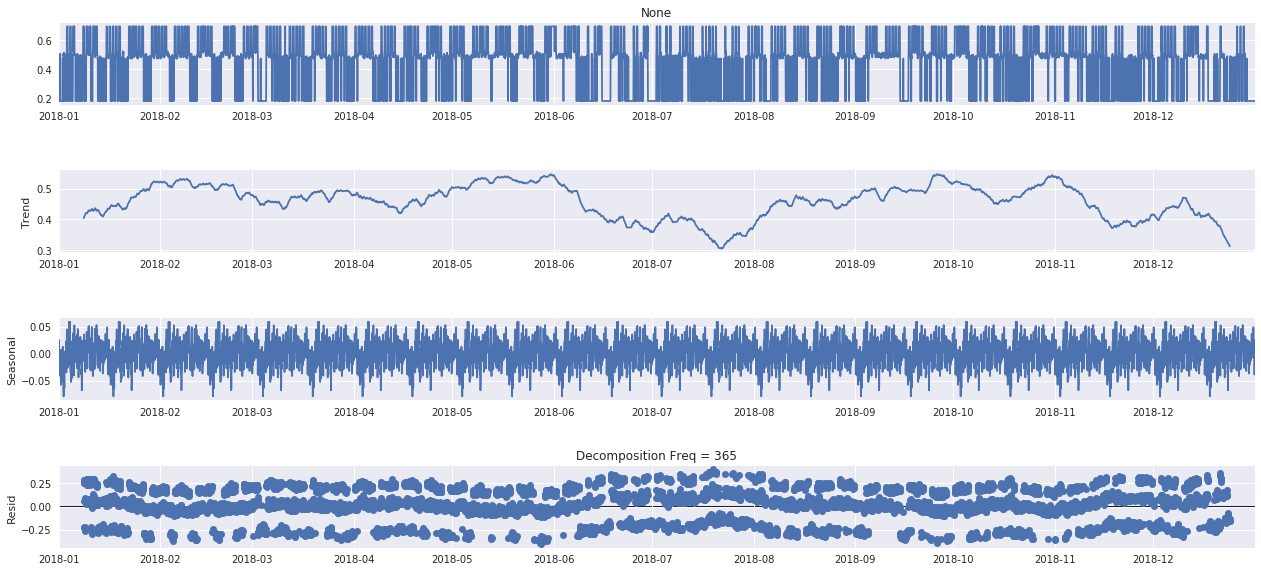

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
labs = head_df[['nlog_lab']]
decomposition = seasonal_decompose(labs, model = 'additive',period=(365))
  
fig = decomposition.plot()
fig.set_figwidth(20)
fig.set_figheight(9)

plt.title('Decomposition Freq = 365')

In de autocorrelatie plot is een patroon te zien waarbij de correlatie iedere 12 uur van negatief naar positief fluctueert. De grootste correlatie is te vinden met het voorgaande uur en bij een precies een week eerder (dus op dezelfde dag van de week).

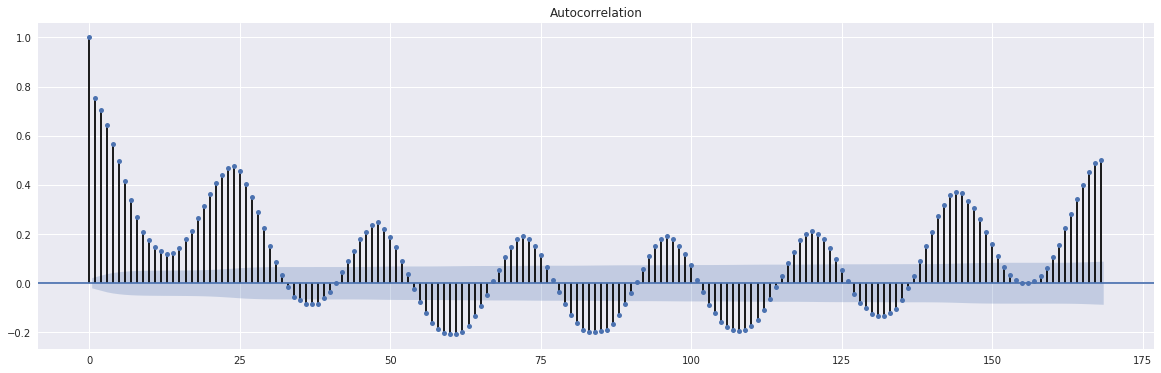

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plot_acf(labs,lags=168)

fig.set_figwidth(20)
fig.set_figheight(6)

>#### 1.D Housing

Hier volgt een dieper onderzoek naar de *Housing* data. Uit de decomositie plot is duidelijk een trend te vinden. Er is een kleine daling in occupancy te zien in eind maart en vervolgens is er een forse daling van de bezettingsgraad tijdens de zomermaanden. Eind augustus komt men terug omdat september het nieuwe schooljaar begint. Begin oktober en eind Novermber zijn er nog twee periodes te zien van verminderde bezetting en in de feestmaand december is er een laag niveau te zien tot aan het eind van het jaar. De drie kleine dipjes in de trend zijn zouden veroorzaakt kunnen worden door korte vakanties. In deze tijdreeks is mooi te zien dat er trendbreuken optreden (zomervakantie, kerstvakantie). Dit zijn momenten waar extra veel aandacht aan besteed zal moeten worden bij het beoordelen van de modellen, welke modellen kan deze incidentele verandering het beste modelleren gebaseerd op 4 weken aan train data?

Text(0.5,1,'Decomposition Freq = 365')

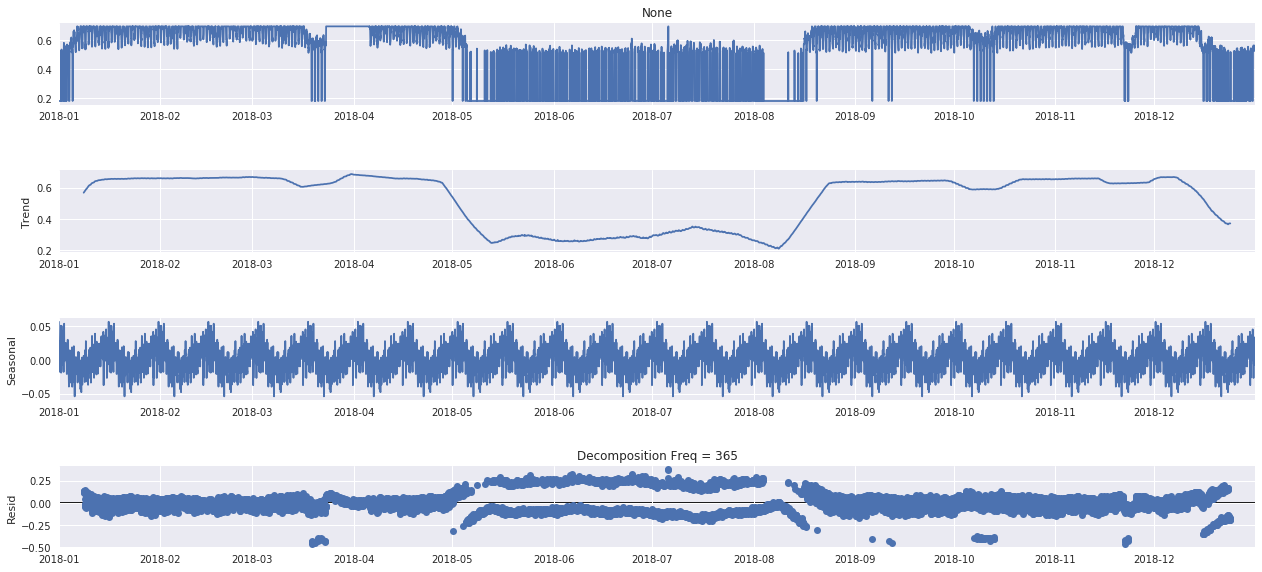

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
house = head_df[['nlog_house']]
decomposition = seasonal_decompose(house, model = 'additive',period=(365))
  
fig = decomposition.plot()
fig.set_figwidth(20)
fig.set_figheight(9)

plt.title('Decomposition Freq = 365')

In de autocorrelatie plot is te zien hoe de correlatie over het algemeen zeer hoog is, maar er is nog steeds een 24 uur patroon te zien. De hoge correlatiecoefficient is kan verklaard worden door de stabiliteit van de bezettingsgraad in de *Housing*, deze veranderd nooit erg veel binnen een periode van één week (behalve tijdens eerdergenoemde trendbreuken). 

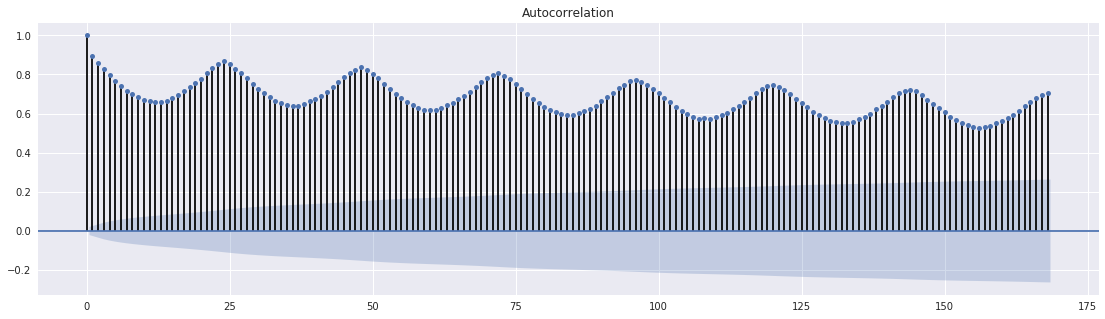

In [15]:
fig = plot_acf(house,lags=168)

fig.set_figwidth(19)
fig.set_figheight(5)

---

>#### 1.E Overzicht Kenmerken

Hier volgen per locatie op campus de belangrijkste karakteristieke eigenschappen in bezttingsgraad die opgedaan zijn uit de verkenning in de voorgaande paragrafen:

1. *Het Auditorium*: Het Auditorium is een locatie die regelmatig wordt gebruikt. Het gebruik volgt een 24 uur patroon welke het meeste correleert met de corresponderende weekdag. In het gemiddelde weekpatroon was te zien hoe het gebruik vrij hoog was door de week heen met elke dag een piek. Echter wanneer het weekend wordt daalt de bezettingsgraad van het auditorium maar behoud het de dagelijkse piek. Er zal meer aandacht besteed moeten worden bij de voorspellingen naar de maand mei wanneer de zomer begint en er een forse daling in trend is.

2. *De Dancehall*: De Dancehall is een locatie op campus die incidenteel gebruikt wordt. In tegenstelling tot het auditorium waar dagelijks colleges worden gegeven wordt de hall bij feestdagen en gelegenheden gebruikt, dit was duidelijk te zien uit de ACF plot die geen piek weergaf voor 168 tijdstappen (1 volle week). In het gemiddelde weekpatroon is dit duidelijk te zien door een zeer lage gemiddelde bezettingsgraad (0.2). Daarnaast is er geen verschil tussen werkdag en weekend. Dit is te verkaren door het incidentele gebruik van de zaal. Hierdoor is deze locatie het moeilijkste te voorspellen doordat er geen periodieke seizoenspatronen zijn die in 4 weken aan train data opgenomen kunnen worden.

3. *Het Laboratorium*: Het de karakteristieken van de bezettingsgraad van het laboratorium lijkt sterk op die van het auditorium waar studenten dagelijks komen voor lessen. Het laboratorium is echter het meest consistente qua trend (over het jaar). Waar in de andere locaties op campus sterke variatie voorkomt (door bijvoorbeeld) vakantie zien we in het laboratorium niet veel verandering. Echter is in het gemiddelde weekpatroon te zien hoe er een zelfde patroon is als in het auditorium. Beide locaties hebben een dagelijkse piek maar dalen wel sterk in het weekend.

4. *De Housing*: Als laatste de Housing. Dit is de locatie waar de studenten overnachten. De universiteit waar deze data vandaan komt ligt in Amerika waar de studenten een wonen in een gebouw op campus. Uit de decompositie werd de trend duidelijk, welke vier dips in bezettingsgraad toont. Over het algemeen ligt de bezettingsgraad hoog maar in de zomer is er een diepe daling doordat mensen niet op campus blijven. Daarnaast is duidelijk te zien hoe in de maand december men ook weer veel minder overnacht op campus. Net als het auditorium en laboratorium is er een 24 uurs patroon. Dit is logisch men keert elke dag terug naar huis. Over het algemeen is de Housing het meest constante tijdreeks. Hierdoor zal het model een betere voorspelling maken gebaseerd op het verleden.

Op elke locatie willen we met behulp van deze patronen en karakteristieken de bezettingsgraad gaan voorspellen voor een week in de toemost. Dit zal gebaseerd zijn op een trainset van 4 weken. Hieruit is meteen duidelijk hoe een jaarlijks verschijnsel niet gemodelleerd kan worden. Echter is het toch interessant om te weten welke modellen met zo weinig informatie de beste voorspelling maakt onder verschillende omstandigheden (locaties op campus). Dit is ook niet voor niets belangrijk omdat in de praktijk facilitymanagers ook alleen actuele meetdata ter beschikking hebben voor voorspellingen wegens privacywetgeving.

---

### 2. Modellen

Het doel van deze Demo is om inzichten te geven over de prestaties van verschillende modellen bij het voorspellen van de bezettingsgraad op campuslocaties.De volgende 2 modellen worden getest:

- SARIMA (Seasonal Autoregressive Integrated Moving Average)
- TBATS (Trigonometric Exponential Smoothing State Space model)

Waarbij de volgende 2 modellen als benchmark gebruikt zullen worden:

- Judgemental Forecast (non-linear)
- Linear Model (additive)

Judgemental Forecast is eigenlijk geen model maar een operatie op de data waarbij uit inzicht een oordeel gemaakt wordt die de voorspelling representeert die wij (opzettelijk naïef) maken. De Judgemental forecast fungeert als benchmark in de zin van dat het een referentiepunt is om de modellen te beoordelen (een soort meetstaaf). De Judgemental Forescast die wij hierop uitvoeren is de gemiddelde van de trainset per weekdag voor een week. De voorspelde week is dan gebaseerd op het gemiddelde van de train-weekdata. Er zijn 4 weken aanwezig in de trainset. De voorspelling is dus het gemiddelde van de 4 weken ervoor. Dit wordt wiskundig ingewikkeld opgeschreven als:

>$  x^{ - t, k}_{i, j}=  \frac{1}{k}  \sum_{(i,j) \in H_{w}} y_{i,j},\;\; t=w, w+1,w+2,...,\;\; k= 1,...,4 $

Hier volgt de code van de modellen waarmee de voorspellingen zijn gemaakt in deze demo, de berekeningen worden niet gerund in dit notebook wegens rekentijd. De functies die gedefinieerd zijn nemen als input de train en test datasets en geven de voorspelling terug voor de periode van één week na het einde van de train set. Je kan er zelf voor kiezen om een langere of korte periode als train of test set aan te bieden mocht dat van toepassing zijn op uw eigen situatie.

```Python
def SARIMA(train, test):
    exog_test = np.array(test['weekend'])
    exog_test = exog_test.reshape(exog_test.shape[0],1)

    model_SARIMA = sm.tsa.statespace.SARIMAX(train['nlog'], exog = train['weekend'], order=(1, 1, 1),seasonal_order=(2, 1, 0, 24))
    model_SARIMA = model_SARIMA.fit()

    sarima_predict = model_SARIMA.predict(start=test.index[0], end=test.index[-1], exog = exog_test)
    return sarima_predict

def getdummies(wdf):
    wdf['hour'] = wdf.index.hour 
    wdf['DayOfWeek'] = wdf.index.day_name()

    dummies  = pd.get_dummies(wdf['DayOfWeek'].astype('object'))
    dummiess = pd.get_dummies(wdf['hour'].astype('object'))
    wdf      = pd.concat([wdf,dummies, dummiess],axis=1)
    wdf      = wdf.drop(columns=['n', 'hour', 'DayOfWeek'], axis=1)
    wdf = wdf.reset_index()
    
    x = wdf.drop(columns=['nlog', 'index'], axis=1)
    y = wdf['nlog']
    return x, y

def LM(train, test):
    tr = getdummies(train)
    te = getdummies(test)
    
    mlr = LinearRegression()
    mlr.fit(tr[0], tr[1])
    lm_pred = mlr.predict(te[0])
    return lm_predict

def JF(train, test):
    iso = train[['nlog']]
    iso['hour'] = iso.index.hour.values
    iso['weekday'] = iso.index.weekday.values
    iso['week'] = iso.index.week.values

    newiso = iso.pivot_table(index = ['weekday', 'hour'], columns = 'week', margins=False)
    jf_predict = newiso.mean(axis=1).values
    return jf_predict

estimator = TBATS(seasonal_periods=[24, 24*7]) # need before to minimize calculationtime
def TBATS_use(train, test):
    fitted_model = estimator.fit(train['nlog'])
    tbats_predict = fitted_model.forecast(steps=24*7)
    return tbats_predict
```

### 3. Resultaten

Voor elke train- en testset zijn voor iedere campuslocatie voorspellingen uitgerekend. Zoals eerder besproken is er gebruik gemaakt van een rolling window van 4 weken (zie Figure 2). Dit resulteert dus in 48 train-test sets. In totaal zijn er dus voor de laaste 48 weken in het jaar 2018 op vier locaties voorspellingen gemaakt voor de occupancy doormiddel van wifi verbindingen welke aantoont hoe druk het is op de locaties op campus. Intotaal zijn dit 48(weken)*4(locaties)*4(modellen) = 768 voorspellingen. Elke voorspelling is een week aan occupancy met meetfrequentie van een uur (168 datapunten).

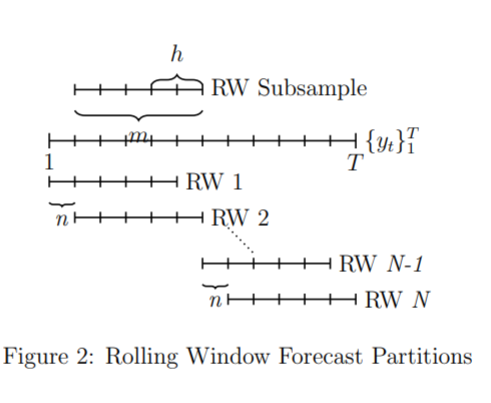

In dit hoofdstuk analyseren wij de voorspellingen en evalueren we welk model het beste past bij ieder van de 4 locaties op campus. Hiervoor kijken wij eerst naar het jaarpatroon. Dit geeft inzicht in hoe jaarlijkse seizoenspatronen zijn opgepakt. Vervolgens wordt per week de root-mean-square error (RMSE) berekend van ieder model om de voorspelling kwantitatief te kunnen beoordelen.

> $RMSE = \sqrt{\frac{\sum_{i=1}^{N}{\Big({Predicted_i - Actual_i}\Big)^2}}{N}}$

Door deze resultaten te combineren met de kenmerken voor de tijdseries kan nu voor karakteristieke gedragspatronen bepaald worden welk model het beste bij welk soort locatie past. Daarvoor hier een korte samenvatting van wat wij in hoofdstuk 1 gevonden hebben uit data analyse:

1. De Dancehall vertoont het minste seasonality omdat men deze locatie op campus gebruiken voor bijzondere gelegenheden. Er is geen patroon in gelegenheden of sportevenementen. Feestdagen zijn echter wel voorbeelden van een patroon maar deze kunnen niet voorspeld worden op basis van een trainset in de orde van weken (4 weken).
2. Housing bezit het meeste seasonality omdat met altijd naar huis aan het einde van de dag. Dit feit alleen zorgt voor een dagelijkse piek. Dit was ook te zien in de autocorrelatie plot in 1.D waarbij een er grote autocorrelatie te zien is voor bijna elke tijdstap.
3. Auditorium en Laboratorium bevatten een beetje van zowel het gedrag van de dancehall als de housing. Studenten hebben alleen op werkdagen college en practica en in het weekend is de faciliteit wel open maar is het gebruik minder consequent. Er is dus meer onzekerheid over de bezetting van het lab in het weekend. Gemiddeld zien op werkdagen hoge occupancy en in het weekend een scherpe daling.

Hieronder beginnen wij eerst met het inladen van de resultaten die vooraf al berekend zijn en plotten wij de resultaten op een manier waardoor deze interactief bekeken kan worden. Er kan door middel van een dropdown een locatie worden gekozen en in de cel daaronder met behulp van een schuifregelaar ingezoomd worden naar de week die men wil bekijken.

In [16]:
def plotreal(Location):
    df = pd.read_csv('results/results_' + Location + '.csv', index_col=0, parse_dates=True)
    
    fig, ax = plt.subplots(5, 1)
    fig.suptitle(Location.capitalize() , fontsize=25)
    
    df['Real'].plot(ax=ax[0], color='red', alpha=0.6)
    ax[0].set_ylim(0,1)
    
    df['Sarima'].plot(ax=ax[1], color = 'blue')
    ax[1].legend(["SARIMA"], bbox_to_anchor=(1.0, 0.5), loc='upper left', fontsize = 13);
    ax[1].set_ylim(-1,1.5)
    
    df['LM'].plot(ax=ax[2], color = 'green')
    ax[2].legend(["Linear Model"], bbox_to_anchor=(1.0, 0.5), loc='upper left', fontsize = 13);
    ax[2].set_ylim(0,1)
    
    df['JF'].plot(ax=ax[3], color = 'purple')
    ax[3].legend(["Judgemental Forecast"], bbox_to_anchor=(1.0, 0.5), loc='upper left', fontsize = 13);
    ax[3].set_ylim(0,1)
    
    df['TBATS'].plot(figsize=(25,15), ax=ax[4], color= 'black')
    ax[4].legend(["TBATS"], bbox_to_anchor=(1.0, 0.5), loc='upper left', fontsize = 13);
    ax[4].set_ylim(0,1)
    
    fig.text(0.5, 0.06, 'Time(months)', ha='center',fontsize=15)
    fig.text(0.1, 0.5, 'Normalized Occupancy', va='center', rotation='vertical',fontsize=15)
    
interact(plotreal, Location=[x.split('_')[-1] for x in names])

interactive(children=(Dropdown(description='Location', options=('auditorium', 'dance', 'labs', 'housing'), val…

<function __main__.plotreal(Location)>

In bovenstaande plot is in één oogopslag te zien in hoe de voorspellingen zich verhouden tot de echte metingen. We kunnen de volgende conclusies trekken (kijkt u mee per locatie via de dropdown!):

- Auditorium: Voor het auditorium is te zien hoe het SARIMA model op 4 weken gebaseerd veel weging geeft aan de seasonality in de trainset. zo schiet het model vaak uit de bocht omdat het de non stationariteit van de trainset extrapoleert. Echter is wel mooi te zien dat het een sprong in trend wel goed wordt gemodelleerd. Dit is ook te zien in het Linear model en Judgemental forecasting. Hierbij heeft het model echter wel nog paar weken nodig om zich aan te passen aan het nieuwe gemiddelde. Tussen deze modellen lijkt JF een betere voorspelling te maken als we vanaf augustus kijken. Hier wordt de ondergrens beter benaderd. TBATS doet het ook zeer goed waarbij, in tegenstelling tot SARIMA, de voorspelling altijd in de goede orde van grootte blijft en niet uitschiet bij plotselinge veranderingen.
- De Dancehall is de meest onvoorspelbare tijdreeks. Dit blijkt ook uit het resultaat waarbij SARIMA duidelijk voor elke week een ander soort trend lijkt te hebben. Weer lijken LM en JF op elkaar. TBATS heeft geen seasonality gevonden in de trainset en maakt met de seasonality die hij wel oppakt een voorspelling die vrij kaal is.
- Het Lab: Weer lijkt SARIMA te sterk te reageren op plotselinge veranderingen in de trainset en wordt de trend te ver geëxtrapoleerd. 
- De Housing was de locatie met de sterkste autocorrelatie. Hierdoor kon het model ook goed de seasonality gebruiken voor voorspellingen. Het is mooi om te zien hoe elk model de sprong in occupancy aan het begin van de zomervakantie mooi heeft nagebootst. Hierbij is opmerkelijk hoe TBATS exact op het moment van daling in trend (gebaseerd op 4 weken ervoor) ook een forse daling voorspeld. SARIMA doet dit ook maar lijkt eerst te ver door te gaan waarop hij in de volgende train-testset zichzelf corrigeert. LM en JF lijken het ook goed te doen en lijken weer erg op elkaar.

Om nu kwanitatief iets te zeggen over elk model volgt hieronder de analyse met de RMSE per rolling window voorspelling.

In [17]:
import plotly.express as px

def plotres(location, week):
    df = pd.read_csv('results/results_' + location + '.csv', index_col=0, parse_dates=True)
    df2 = pd.read_csv('results/Errors_' + location + '.csv', index_col=0, parse_dates=True)
    
    fig = px.line(df2.reset_index(), x='index', y=df2.columns.tolist(), width=900, height=500, 
                 title=f"Errors: {location}")
    
    fig.update_layout(
    xaxis_title="Time(date)",
    yaxis_title="RMSE",
    legend_title="Model:",
    )
    
    fig.show()
    
    fig2 = px.line(df.reset_index(),  x='index', y=df.columns.tolist(), width=900, height=500,
                  title=f"Voorspellingen: {location}")
    
    fig2.update_layout(
    xaxis_title="Time(date)",
    yaxis_title="Normalized Occupancy",
    legend_title="Model:",
    )
    
    fig2.show()
        
    fig3 = px.line(df[df.index.week == week].reset_index(), x='index', y=df.columns.tolist(), width=900, height=500,
                  title=f"Week: {week}")
    
    fig3.update_layout(
    xaxis_title="Time(date)",
    yaxis_title="Normalized Occupancy",
    legend_title="Model:",
    )
    
    fig3.show()

interact(plotres, week=widgets.IntSlider(min=5, max=52, step=1), location=[x.split('_')[-1] for x in names])

interactive(children=(Dropdown(description='location', options=('auditorium', 'dance', 'labs', 'housing'), val…

<function __main__.plotres(location, week)>

In de figuur hierboven zijn drie plots te zien. De eerst is de error plot waarbij de RMSE als functie van het weeknummer geplot is. De tweede plot toont de voorspellingen van alle voorpelmodellen over de hele periode. Hier kan in ingezoomd worden om maandelijkse voorspellingen te zien (dubbelklik om weer uit te zoomen). Als laatste is per week de voorspellingen geplot. Dit geeft het meeste gedetaileerde inzicht op het gedrag van de verschillende modellen. 

- Auditorium: De hoogste error komt voor bij de overgang van een hoge occupancy naar een langdurige verlaging. In de errorplot is dit te zien vanaf week 18. Als we inzoomen op week 19 is te zien hoe vanaf 11 Mei de occupancy uit het niets daalt. Te zien is hoe de eerste voorspellingen dit effect nog niet hebben opgepakt. In week 20 zien we dat SARIMA de negatieve sprong extrapoleert tot aan negatieve waardes terwijl de andere modellen in de juiste orde van grootte voorspellen. 
- Dancehall: In de errorplot is duidelijk te zien wat het verschil is tussen de modellen. De dancehall is een locatie die geen seasonality heeft. SARIMA pikt de zwakke trend wel op en extrapoleert deze, terwijl de andere 3 modellen heel nauw op elkaar blijven is de error van SARIMA erg piekerig door deze aanname.
- Lab: Laat het zelfde effect zien als het auditorium
- Housing: Hier doet SARIMA het beter dan in de andere locaties. Dit verwachten wij ook met de hoge autocorrelatie van de tijdserie. Week 18/19 is een belangrijk moment in deze tijdserie waarbij er een forse incidentele daling is van de occupancy. Dit is ook het moment waarbij de error piekt. De laagste piek in error is te vinden bij TBATS. Als er ingezoomd wordt naar week 18 en daarna 19 is te zien wat er gebeurt met de voorspellingen. Op 5 mei begint de daling. In de week 19 plot is vervolgens te zien hoe LM en JF nog op het oude gemiddelde zitten terwijl TBATS al de goede hoogte heeft gevonden om rond te oscilleren. SARIMA is zoals te zien de mist in gegaan en blijft doorzakken. Na 1 week (in week 20) heeft SARIMA zichzelf gecorriegeerd en lijkt het ook het correcte dagpatroon te hebben gevonden. TBATS heeft wel het juiste gemiddelde voorspeld maar kan geen dagpatroon modelleren. 

In [18]:
# #check welke beter is (plotly vs plt)

# #interactieve plot voor verkenning van resultaten
# plt.style.use('seaborn')
# def plotres(Location, Week):
#     df = pd.read_csv('results/results_' + Location + '.csv', index_col=0, parse_dates=True)
#     df2 = pd.read_csv('results/Errors_' + Location + '.csv', index_col=0, parse_dates=True)
    
#     ax0 = df2.plot(figsize = (19,6), title = 'Errors 2018: ' + Location.capitalize())
#     ax0.set_xlabel("Time(week)")
#     ax0.set_ylabel("RMSE")
#     ax0.set_xlim(5,52)
    
#     ax = df.plot(figsize = (19,6), title = 'Voorspelling 2018: ' + Location.capitalize())
#     ax.set_xlabel("Time(month)")
#     ax.set_ylabel("Normalized Occupancy")
    
#     ax2 = df[df.index.week == Week].plot(title = f'Week {Week}', figsize = (19,6))
#     ax2.set_xlabel("Time(date)")
#     ax2.set_ylabel("Normalized Occupancy")
    
# interact(plotres, Week=widgets.IntSlider(min=5, max=52, step=1), Location=[x.split('_')[-1] for x in names])
# plt.show()

De RMSE wordt gebruikt om te tellen in hoeveel weken een model "het beste" presteerde (laagste error). In de code hieronder wordt deze berekening gemaakt. Er wordt ook een dataframe gemaakt met rijen de week en kolommen de locaties. 

In [82]:
#berekeningen best model
for i in range(len(names)):
    df = pd.read_csv('results/results_' + names[i].split('_')[-1] + '.csv', index_col=0, parse_dates=True)
    df2 = pd.read_csv('results/Errors_' + names[i].split('_')[-1] + '.csv', index_col=0, parse_dates=True)
        
    l = []
    for j in df2.index:
        l.append(df2.columns[df2[df2.index == j].values.argmin()])
    
    if i == 0:
        main = pd.DataFrame(index=range(5, 53), data=l, columns=['best_' + names[i].split('_')[-1]])
        models = set(l)
    else:
        main['best_' + names[i].split('_')[-1]] = l
    
    bestmodel2 = [l.count(x) if l.count(x) > 0 else 0 for x in models]
    
    if i == 0:
        data = {names[i]:bestmodel2} 
        newmain = pd.DataFrame(data, index=models)
    else:
        newmain[names[i]] = bestmodel2
        
newmain.columns = [x.split('_')[-1].capitalize() for x in newmain.columns]

print('bestmodel count:')
display(newmain)

print('summary of bestmodel:')
display(main.describe())

bestmodel count:


Auditorium  Dance  Labs  Housing
LM               5     19    16       15
JF              26      0    15        5
Sarima           5      0     0       11
TBATS           12     29    17       17

summary of bestmodel:


best_auditorium best_dance best_labs best_housing
count               48         48        48           48
unique               4          2         3            4
top                 JF      TBATS     TBATS        TBATS
freq                26         29        17           17

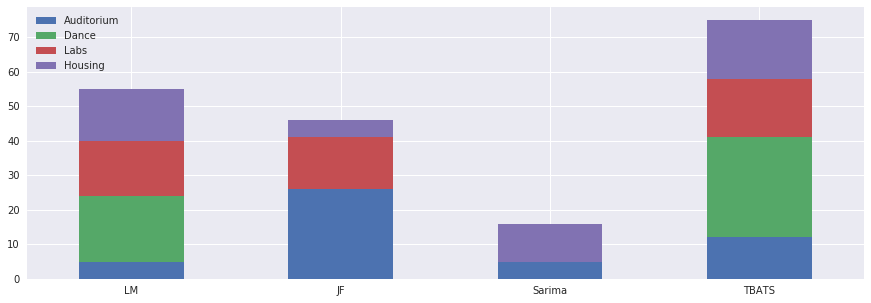

In [78]:
newmain.plot(kind='bar', stacked=True, figsize=(15,5), rot=0)
plt.show()

Hierboven is het resultaat te zien. Voor elke locatie is geteld hoevaak elk model het beste presteerde. Oftewel hoe goed een model het weekpatroon kan voorspellen op basis van een maand aan historische traindata. Het volgende is op te merken aan de resultaten (output tweede cel hierboven):

- TBATS is voor 3 van de 4 locaties het beste model (top), maar twee van de drie keer is dat niet overtuigend maar met een verschil van 1 a 2 betere weken. Voor de enige locatie waar hij niet op nummer één staat (het auditorium) staat hij op de 2e plaats.
- SARIMA staat 3 keer op de laatste plaats. In de dancehall en lab komt hij geen een week naar voren als beste. op de housing dataset presteert SARIMA echter wel erg goed. 
- Judgemental Forecasting is in het auditorium de overtuigende winnnaar maar bij de dancehall is hij geen enkele keer als beste naarvoren gekomen en ook bij de housing is JF het slechts presterende model.
- Het Linear model lijkt het meest consistente te zijn bij verschillende tijdseries (locaties).

### 4. Conclusie

Het doel van deze case study was om inzichten te vergaren over welke voorspelmodellen het beste presteren voor campuslocaties met verschillende karakteristieke bezettingspatronen. Uit de resultaten blijkt dat bij een plotselinge overgang van de bezetting TBATS het het beste voorspelt terwijl SARIMA zich te veel baseert op de historische trend in de train dataset. Dit zorgt er voor dat SARIMA te reactief blijkt te zijn en later gaat overcompenseren. Echter een voordeel van SARIMA is wel dat het dagpatroon  goed wordt gemodeleerd, maar door de overcompensatie heeft dit model vaak grote uitschieters in de error. 

_SARIMA reageert te sterk op plotselingen overgangen terwijl TBATS meer weging geeft aan recente datapunten en dus de historische trend minder extreem extrapoleert._

Het Linear regressie model en Judgemental Forecasting lijken veel op elkaar. Niet alleen is de voorspelling qua patroon heel vergelijkbaar, maar de RMSE is in dezelfde range. Wanneer de tijdreeks stationair is zonder enige bijzondere seizoenspatronen lijkt LM en JF het beter te doen dan SARIMA en TBATS.

De occupancy tijdreeksen hebben echter juist vaak seizoenspatronen (zowel dag, week als jaar), dus is het in de meeste gevallen beter om SARIMA of TBATS te gebruiken. Van deze twee is TBATS wel de duidelijke winnaar in deze case study door haar veel lagere RMSE en continuieit in toepasbaarheid over verschillende locaties (TBATS is 3/4 keer het best model gebaseerd op RMSE).

Hoe kan deze informatie helpen bij het realiseren van smart buildings? Uit deze case study komt duidelijk naar voren  hoe belangrijk het begrip van de tijdreeks is en dat er verschillende soorten patronen kunnen voorkomen. In Hoofdstuk 1 vonden wij bijvoorbeeld effecten van vakanties en feestdagen in de bezettingsgraad van gebouwen op campus. Het is aan de facilitybeheerder om te begrijpen hoe de bezettingsgraad varieert door de tijd heen. Als er begrip is van het gebouw dan kunnen de volgende bevindingen uit deze case study voorspelling van occupancy op campus verbeteren:

1. SARIMA is reageert sterk op de trend en seasonality van de train data die je hem aanlevert. Dit kan nadelig zijn, maar kan ook als voordeel gebruikt worden. Bij gebouwen waarbij de trend zeer dynamisch is en het gebruik zeer afhankelijk is van de train set (verleden op heden) is SARIMA een inzetbaar model. SARIMA modeleert het dagpatroon zeer goed maar wijkt meer uit af in de absolute waarde. Een benchmark zoals het Lineaire model kan handig zijn als verificatie van het gemiddelde niveau om eventueel te corrigeren voor overcompensatie. _Sarima werkt goed voor kortdurende voorspellingen waarbij de aanname is dat het patroon dynamisch verandert door de tijd heen._
2. JF en LM zijn op zichzelf niet goed genoeg om voorspellingen uit te voeren voor complexe tijdreeksen. Dit is terug te zien in de resultaten waarbij de de modellen zich onderscheidden niet door bijzonder nauwkeurige voorspellingen maar juist door degelijkheid en ongevoeligheid voor trendbreuken. JF en LM zijn wel geschikt om het basispatroon in een tijdreeks te onderzoeken.
3. TBATS is de duidelijke winnaar en we geadviseren om deze ook te gebruiken voor occupancy voorspellingen. Niet alleen waren de voorspellingen beter, maar bij trendverandering reageert TBATS ook op een gepaste wijze waarbij de voorspelling niet overcompenseert. TBATS is in staat om occupancy te voorspellen voor locaties op Campus ook bij kantelpunten waar het patroon veranderd. "Housing" is een voorbeeld waar dit model het zeer goed deed door de hoge autocorrelatie. TBATS is in staat om op kort termijn en op lange termijn gedrag te modelleren. Dit sluit het beste aan bij de realiteit waarin er geen lange tijdseries beschikbaar zijn voor voorspellingen voor dit doeleinde (smart buildings) wegens privacy regelgevingen. TBATS heeft wel verreweg de langste rekentijd van alle modellen, maar dit hoeft geen bezwaar te zijn wanneer er wekelijks een enkele voorspelling gedaan moet worden. 

---

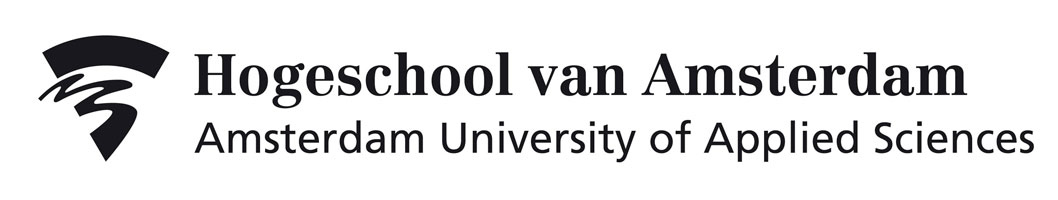